<a href="https://colab.research.google.com/github/Augista/EAS_Classification-Data/blob/main/EASkomnum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = 'EASKOMNUM.csv'

df = pd.read_csv(data)
print(df.head())
# Memeriksa kolom yang ada dalam DataFrame
print("Kolom dalam DataFrame:", df.columns)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num  
0  0    6    0  
1  3    3    2  
2  2    7    1  
3  0    3    0  
4  0    3    0  
Kolom dalam DataFrame: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [5]:
# Mengonversi kolom yang memiliki nilai string menjadi numerik jika diperlukan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data setelah konversi nilai string menjadi numerik:")
print(df.head())

Data setelah konversi nilai string menjadi numerik:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [6]:
# Mengisi nilai yang hilang dengan KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("Data setelah imputasi nilai yang hilang:")
print(df_imputed.head())

Data setelah imputasi nilai yang hilang:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0  0.0  
1    2.0  3.0   3.0  2.0  
2    2.0  2.0   7.0  1.0  
3    3.0  0.0   3.0  0.0  
4    1.0  0.0   3.0  0.0  


In [7]:
# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
columns_to_normalize = df.columns.difference(['num'])
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
df_normalized['num'] = df['num']
print("Data setelah normalisasi:")
print(df_normalized.head())

Data setelah normalisasi:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  num  
0  0.370968    1.0  0.000000  0.75    0  
1  0.241935    0.5  1.000000  0.00    2  
2  0.419355    0.5  0.666667  1.00    1  
3  0.564516    1.0  0.000000  0.00    0  
4  0.225806    0.0  0.000000  0.00    0  


In [8]:
# fitur dan label kita pisahkan dulu (asumsi kolom terakhir adalah label)
X = df_normalized.iloc[:, :-1]
print("Fitur (X) setelah dipisahkan:")
print(X.head())
y = df_normalized.iloc[:, -1]
print("Label (y) setelah dipisahkan:")
print(y.head())

Fitur (X) setelah dipisahkan:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  
Label (y) setelah dipisahkan:
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [9]:
# Konversi label menjadi tipe kategori
y = y.astype('int')
print("Label (y) setelah konversi ke tipe kategori:")
print(y.head())

Label (y) setelah konversi ke tipe kategori:
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [10]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (242, 13)
Testing set size: (61, 13)


Training labels distribution:
num
0    130
1     47
3     27
2     25
4     13
Name: count, dtype: int64
Test labels distribution:
num
0    34
2    11
1     8
3     8
Name: count, dtype: int64
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Cross-validation accuracy scores: [0.55102041 0.55102041 0.5625     0.60416667 0.60416667]
Mean cross-validation accuracy: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1-Score: 0.62
Confusion Matrix:
[[32  1  1  0  0]
 [ 5  0  0  3  0]
 [ 2  0  3  3  3]
 [ 0  2  0  4  2]
 [ 0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.00      0.00      0.00         8
           2       0.75      0.27      0.40        11
           3       0.40      0.50      0.44         8
           4       0.00      1.00      0.00         0

    accuracy                           0.64        61
   macro avg       0.39      0.54      0.34        61
weighted avg       0.65      0.64      0.62        61



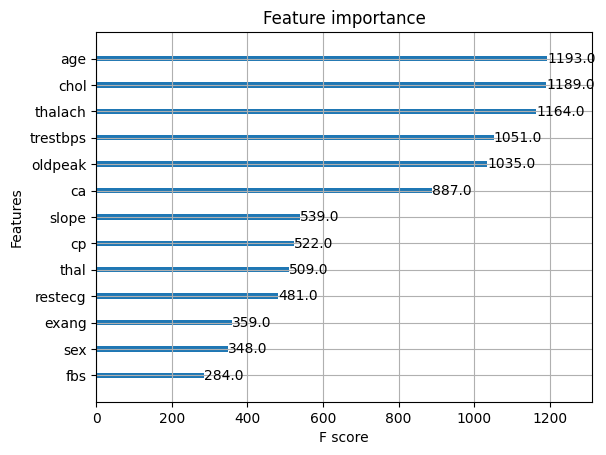

Random Forest Accuracy: 0.59
SVM Accuracy: 0.59
Logistic Regression Accuracy: 0.67
XGBoost Accuracy: 0.62


In [30]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Check data
print("Training labels distribution:")
print(y_train.value_counts())
print("Test labels distribution:")
print(y_test.value_counts())

# Feature importance analysis for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_

# Cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit the best model on the resampled training data
best_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = best_model.predict(X_test)
y_true = y_test

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Binarize the output labels for multi-class ROC AUC score
y_true_bin = label_binarize(y_true, classes=best_model.classes_)
y_score = best_model.predict_proba(X_test)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_true, y_pred,zero_division=1)
print("Classification Report:")
print(class_report)

# Plot feature importance
plot_importance(best_model)
plt.show()

# Model comparison
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': best_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize

# Check data
print("Training labels distribution:")
print(y_train.value_counts())
print("Test labels distribution:")
print(y_test.value_counts())

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit the best model on the resampled training data
best_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = best_model.predict(X_test)
y_true = y_test

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

class_report = classification_report(y_true, y_pred,zero_division=1)
print("Classification Report:")
print(class_report)


Training labels distribution:
num
0    130
1     47
3     27
2     25
4     13
Name: count, dtype: int64
Test labels distribution:
num
0    34
2    11
1     8
3     8
Name: count, dtype: int64
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Cross-validation accuracy scores: [0.57142857 0.57142857 0.45833333 0.58333333 0.54166667]
Mean cross-validation accuracy: 0.55
Accuracy: 0.57
Precision: 0.54
Recall: 0.57
F1-Score: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.00      0.00      0.00         8
           2       0.29      0.18      0.22        11
           3       0.14      0.12      0.13         8
           4       0.00      1.00      0.00         0

    accuracy                           0.57        61
   macro avg       0.25     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)
y_true = y_test

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = classification_report(y_true, y_pred,zero_division=1)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Cross-validation accuracy scores: [0.57142857 0.57142857 0.45833333 0.58333333 0.54166667]
Mean cross-validation accuracy: 0.55
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.00      0.00      0.00         8
           2       0.50      0.18      0.27        11
           3       0.11      0.12      0.12         8
           4       0.00      1.00      0.00         0

    accuracy                           0.56        61
   macro avg       0.28      0.44      0.24        61
weighted avg       0.54      0.56      0.53        61



In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
report = (classification_report(y_true,y_pred, zero_division=1))

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

print("Predicted values:")
print(y_pred)
print("True values:")
print(y_true)

Accuracy: 62.295081967213115
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        34
           1       0.25      0.25      0.25         8
           2       0.33      0.09      0.14        11
           3       0.50      0.25      0.33         8
           4       0.00      1.00      0.00         0

    accuracy                           0.62        61
   macro avg       0.36      0.51      0.31        61
weighted avg       0.57      0.62      0.57        61

Predicted values:
[0 1 0 0 0 0 2 0 0 0 0 2 1 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 1 0 3
 0 0 0 0 0 0 0 0 0 0 1 1 3 0 0 0 0 2 0 4 0 0 0 1]
True values:
69     1
300    3
220    0
134    0
7      0
      ..
1      2
23     3
56     1
75     0
252    0
Name: num, Length: 61, dtype: int64


In [ ]:
print("Fitur pelatihan (X_train):")
print(X_train.head())
print("Label pelatihan (y_train):")
print(y_train.head())
print("Fitur pengujian (X_test):")
print(X_test.head())
print("Label pengujian (y_test):")
print(y_test.head())

Fitur pelatihan (X_train):
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
184  0.645833  0.0  1.000000  0.603774  0.408676  0.0      1.0  0.687023   
19   0.416667  1.0  0.333333  0.339623  0.319635  0.0      0.0  0.763359   
118  0.708333  1.0  1.000000  0.339623  0.465753  1.0      1.0  0.465649   
41   0.229167  1.0  0.000000  0.433962  0.166667  0.0      0.0  0.816794   
59   0.458333  1.0  0.000000  0.292453  0.198630  0.0      1.0  0.412214   

     exang   oldpeak  slope        ca  thal  
184    0.0  0.000000    0.0  0.000000   0.0  
19     0.0  0.096774    0.0  0.000000   0.0  
118    1.0  0.290323    0.0  1.000000   1.0  
41     1.0  0.225806    0.0  0.000000   1.0  
59     1.0  0.225806    0.0  0.333333   0.0  
Label pelatihan (y_train):
184    1
19     0
118    3
41     0
59     0
Name: num, dtype: int64
Fitur pengujian (X_test):
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
69   0.354167  1.0  0.666667  0.528302  0.

In [34]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Dummy example of loading data (replace with your actual data loading/preprocessing)
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape data for CNN
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes for MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


2.15.0
Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1244 - accuracy: 0.9614 - val_loss: 0.0441 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0317 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0272 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0271 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0